[View in Colaboratory](https://colab.research.google.com/github/redcican/Master-Thesis/blob/master/09_Advanced_Optimization_Algorithms_FashionMnist.ipynb)

# 09 Comparison of Different Advanced Optimization Algorithms Using FashionMNIST


## 1. Introduction to the Dataset

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes

Labels:


*   0 : T-shirt/top
*   1 : Trouser
*   2 : Pullover
*   3 : Dress
*   4 : Coat
*   5 : Sandal
*   6 : Shirt
*   7 : Sneake
*   8 : Bag
*   9 : Ankle Boot











## 2. Data Preprocessing

In [1]:
from keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
from keras.datasets import fashion_mnist
(X_train,Y_train),(X_test,Y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
num_classes = 10
img_rows, img_cols = 28, 28
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
Y_train = to_categorical(Y_train,num_classes)
Y_test = to_categorical(Y_test, num_classes)

In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
X_train.shape, X_test.shape,Y_train.shape, Y_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000, 10), (10000, 10))

## 3. Building the Neural Network

In [5]:
import time
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from keras.layers.normalization import BatchNormalization

In [6]:
batch_size = 256
epochs = 100
input_shape = (img_rows, img_cols, 1)
num_classes = 10

In [10]:
def model(optimizer):
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3,3), activation='relu',
                   kernel_initializer='he_normal',input_shape=input_shape))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.25))
  model.add(Conv2D(64, (3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))
  model.add(Conv2D(128,(3,3), activation='relu'))
  model.add(Dropout(0.4))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(num_classes,activation='softmax'))
  
  model.compile(loss='categorical_crossentropy',
               optimizer=optimizer,metrics=['accuracy'])
  
  return model

### 3.1 Optimizer = vanilla SGD with learning rate = 0.01




In [11]:
vanilla_sgd = optimizers.SGD(lr=0.01, decay=0, momentum=0, nesterov=False)

In [12]:
start = time.time()
model_1 = model(vanilla_sgd)
model_1_history = model_1.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_test,Y_test))
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 6s - loss: 1.7430 - acc: 0.3537 - val_loss: 1.1522 - val_acc: 0.6112
Epoch 2/100
 - 4s - loss: 1.1608 - acc: 0.5549 - val_loss: 0.9079 - val_acc: 0.6875
Epoch 3/100
 - 4s - loss: 0.9666 - acc: 0.6353 - val_loss: 0.8008 - val_acc: 0.7243
Epoch 4/100
 - 4s - loss: 0.8797 - acc: 0.6706 - val_loss: 0.7531 - val_acc: 0.7319
Epoch 5/100
 - 4s - loss: 0.8154 - acc: 0.6935 - val_loss: 0.7099 - val_acc: 0.7457
Epoch 6/100
 - 4s - loss: 0.7713 - acc: 0.7089 - val_loss: 0.6714 - val_acc: 0.7541
Epoch 7/100
 - 4s - loss: 0.7441 - acc: 0.7196 - val_loss: 0.6501 - val_acc: 0.7575
Epoch 8/100
 - 4s - loss: 0.7184 - acc: 0.7286 - val_loss: 0.6367 - val_acc: 0.7618
Epoch 9/100
 - 4s - loss: 0.6986 - acc: 0.7345 - val_loss: 0.6186 - val_acc: 0.7672
Epoch 10/100
 - 4s - loss: 0.6784 - acc: 0.7428 - val_loss: 0.6081 - val_acc: 0.7709
Epoch 11/100
 - 4s - loss: 0.6636 - acc: 0.7478 - val_loss: 0.5923 - val_acc: 0.7797
Epoch 12/100
 - 4s - los

 - 4s - loss: 0.5151 - acc: 0.8088 - val_loss: 0.4594 - val_acc: 0.8279
Epoch 35/100
 - 4s - loss: 0.5104 - acc: 0.8086 - val_loss: 0.4536 - val_acc: 0.8306
Epoch 36/100
 - 4s - loss: 0.5054 - acc: 0.8116 - val_loss: 0.4540 - val_acc: 0.8301
Epoch 37/100
 - 4s - loss: 0.5022 - acc: 0.8131 - val_loss: 0.4494 - val_acc: 0.8334
Epoch 38/100
 - 4s - loss: 0.4992 - acc: 0.8136 - val_loss: 0.4477 - val_acc: 0.8354
Epoch 39/100
 - 4s - loss: 0.4967 - acc: 0.8162 - val_loss: 0.4479 - val_acc: 0.8334
Epoch 40/100
 - 4s - loss: 0.4933 - acc: 0.8177 - val_loss: 0.4416 - val_acc: 0.8362
Epoch 41/100
 - 4s - loss: 0.4898 - acc: 0.8177 - val_loss: 0.4367 - val_acc: 0.8382
Epoch 42/100
 - 4s - loss: 0.4869 - acc: 0.8211 - val_loss: 0.4346 - val_acc: 0.8393
Epoch 43/100
 - 4s - loss: 0.4829 - acc: 0.8216 - val_loss: 0.4274 - val_acc: 0.8414
Epoch 44/100
 - 4s - loss: 0.4806 - acc: 0.8214 - val_loss: 0.4266 - val_acc: 0.8433
Epoch 45/100
 - 4s - loss: 0.4775 - acc: 0.8238 - val_loss: 0.4244 - val_acc: 

Epoch 68/100
 - 4s - loss: 0.4235 - acc: 0.8445 - val_loss: 0.3770 - val_acc: 0.8625
Epoch 69/100
 - 4s - loss: 0.4231 - acc: 0.8453 - val_loss: 0.3710 - val_acc: 0.8664
Epoch 70/100
 - 4s - loss: 0.4176 - acc: 0.8471 - val_loss: 0.3746 - val_acc: 0.8643
Epoch 71/100
 - 4s - loss: 0.4189 - acc: 0.8462 - val_loss: 0.3676 - val_acc: 0.8678
Epoch 72/100
 - 4s - loss: 0.4154 - acc: 0.8478 - val_loss: 0.3673 - val_acc: 0.8673
Epoch 73/100
 - 4s - loss: 0.4143 - acc: 0.8476 - val_loss: 0.3720 - val_acc: 0.8655
Epoch 74/100
 - 4s - loss: 0.4158 - acc: 0.8485 - val_loss: 0.3633 - val_acc: 0.8683
Epoch 75/100
 - 4s - loss: 0.4116 - acc: 0.8513 - val_loss: 0.3657 - val_acc: 0.8684
Epoch 76/100
 - 4s - loss: 0.4108 - acc: 0.8505 - val_loss: 0.3624 - val_acc: 0.8696
Epoch 77/100
 - 4s - loss: 0.4101 - acc: 0.8506 - val_loss: 0.3623 - val_acc: 0.8686
Epoch 78/100
 - 4s - loss: 0.4065 - acc: 0.8507 - val_loss: 0.3558 - val_acc: 0.8712
Epoch 79/100
 - 4s - loss: 0.4081 - acc: 0.8515 - val_loss: 0.355

In [13]:
train_loss_1, train_accuracy_1 = model_1.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_1 * 100, train_loss_1))
test_loss_1, test_accuracy_1 = model_1.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_1 * 100, test_loss_1))

Training Accuracy = 88.88 %     loss = 0.306513
Testing Accuracy = 88.03 %    loss = 0.331603


### 3.2 Optimizer = SGD with Momentum learning rate = 0.01, beta=0.9

In [14]:
sgd_momentum = optimizers.SGD(lr=0.01, decay=0, momentum=0.9, nesterov=False)

In [15]:
start = time.time()
model_2 = model(sgd_momentum)
model_2_history = model_2.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_test,Y_test))
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 5s - loss: 1.0434 - acc: 0.6050 - val_loss: 0.6239 - val_acc: 0.7614
Epoch 2/100
 - 4s - loss: 0.6511 - acc: 0.7530 - val_loss: 0.5469 - val_acc: 0.7965
Epoch 3/100
 - 4s - loss: 0.5843 - acc: 0.7807 - val_loss: 0.4939 - val_acc: 0.8108
Epoch 4/100
 - 4s - loss: 0.5376 - acc: 0.7969 - val_loss: 0.4679 - val_acc: 0.8222
Epoch 5/100
 - 4s - loss: 0.5099 - acc: 0.8104 - val_loss: 0.4440 - val_acc: 0.8358
Epoch 6/100
 - 4s - loss: 0.4816 - acc: 0.8206 - val_loss: 0.4115 - val_acc: 0.8453
Epoch 7/100
 - 4s - loss: 0.4613 - acc: 0.8293 - val_loss: 0.3979 - val_acc: 0.8541
Epoch 8/100
 - 4s - loss: 0.4424 - acc: 0.8354 - val_loss: 0.3827 - val_acc: 0.8597
Epoch 9/100
 - 4s - loss: 0.4267 - acc: 0.8444 - val_loss: 0.3735 - val_acc: 0.8628
Epoch 10/100
 - 4s - loss: 0.4127 - acc: 0.8486 - val_loss: 0.3733 - val_acc: 0.8600
Epoch 11/100
 - 4s - loss: 0.4018 - acc: 0.8512 - val_loss: 0.3466 - val_acc: 0.8696
Epoch 12/100
 - 4s - los

 - 4s - loss: 0.2893 - acc: 0.8945 - val_loss: 0.2649 - val_acc: 0.9004
Epoch 35/100
 - 4s - loss: 0.2865 - acc: 0.8944 - val_loss: 0.2655 - val_acc: 0.9021
Epoch 36/100
 - 4s - loss: 0.2817 - acc: 0.8967 - val_loss: 0.2628 - val_acc: 0.9030
Epoch 37/100
 - 4s - loss: 0.2843 - acc: 0.8940 - val_loss: 0.2610 - val_acc: 0.9034
Epoch 38/100
 - 4s - loss: 0.2842 - acc: 0.8956 - val_loss: 0.2633 - val_acc: 0.9021
Epoch 39/100
 - 4s - loss: 0.2777 - acc: 0.8975 - val_loss: 0.2571 - val_acc: 0.9047
Epoch 40/100
 - 4s - loss: 0.2792 - acc: 0.8964 - val_loss: 0.2660 - val_acc: 0.8987
Epoch 41/100
 - 4s - loss: 0.2770 - acc: 0.8977 - val_loss: 0.2538 - val_acc: 0.9036
Epoch 42/100
 - 4s - loss: 0.2733 - acc: 0.8992 - val_loss: 0.2571 - val_acc: 0.9043
Epoch 43/100
 - 4s - loss: 0.2701 - acc: 0.9006 - val_loss: 0.2501 - val_acc: 0.9066
Epoch 44/100
 - 4s - loss: 0.2715 - acc: 0.9013 - val_loss: 0.2514 - val_acc: 0.9072
Epoch 45/100
 - 4s - loss: 0.2691 - acc: 0.9011 - val_loss: 0.2523 - val_acc: 

Epoch 68/100
 - 4s - loss: 0.2371 - acc: 0.9112 - val_loss: 0.2339 - val_acc: 0.9110
Epoch 69/100
 - 4s - loss: 0.2395 - acc: 0.9119 - val_loss: 0.2271 - val_acc: 0.9151
Epoch 70/100
 - 4s - loss: 0.2354 - acc: 0.9120 - val_loss: 0.2256 - val_acc: 0.9168
Epoch 71/100
 - 4s - loss: 0.2348 - acc: 0.9131 - val_loss: 0.2280 - val_acc: 0.9142
Epoch 72/100
 - 4s - loss: 0.2343 - acc: 0.9130 - val_loss: 0.2253 - val_acc: 0.9169
Epoch 73/100
 - 4s - loss: 0.2342 - acc: 0.9139 - val_loss: 0.2268 - val_acc: 0.9149
Epoch 74/100
 - 4s - loss: 0.2302 - acc: 0.9150 - val_loss: 0.2363 - val_acc: 0.9115
Epoch 75/100
 - 4s - loss: 0.2316 - acc: 0.9138 - val_loss: 0.2279 - val_acc: 0.9140
Epoch 76/100
 - 4s - loss: 0.2295 - acc: 0.9149 - val_loss: 0.2248 - val_acc: 0.9149
Epoch 77/100
 - 4s - loss: 0.2319 - acc: 0.9131 - val_loss: 0.2256 - val_acc: 0.9180
Epoch 78/100
 - 4s - loss: 0.2279 - acc: 0.9136 - val_loss: 0.2258 - val_acc: 0.9175
Epoch 79/100
 - 4s - loss: 0.2257 - acc: 0.9157 - val_loss: 0.229

In [16]:
train_loss_2, train_accuracy_2 = model_2.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_2 * 100, train_loss_2))
test_loss_2, test_accuracy_2 = model_2.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_2 * 100, test_loss_2))

Training Accuracy = 94.75 %     loss = 0.140330
Testing Accuracy = 91.79 %    loss = 0.218544


### 3.3 Optimizer = SGD with Momentum learning rate = 0.01, beta=0.9, NAG=true

In [17]:
NAG_momentum = optimizers.SGD(lr=0.01, decay=0, momentum=0.9, nesterov=True)

In [18]:
start = time.time()
model_3 = model(NAG_momentum)
model_3_history = model_3.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_test,Y_test))
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 5s - loss: 1.0171 - acc: 0.6184 - val_loss: 0.6096 - val_acc: 0.7708
Epoch 2/100
 - 4s - loss: 0.6310 - acc: 0.7610 - val_loss: 0.5293 - val_acc: 0.8006
Epoch 3/100
 - 4s - loss: 0.5652 - acc: 0.7875 - val_loss: 0.4779 - val_acc: 0.8210
Epoch 4/100
 - 4s - loss: 0.5205 - acc: 0.8048 - val_loss: 0.4473 - val_acc: 0.8322
Epoch 5/100
 - 4s - loss: 0.4913 - acc: 0.8189 - val_loss: 0.4185 - val_acc: 0.8447
Epoch 6/100
 - 4s - loss: 0.4645 - acc: 0.8278 - val_loss: 0.3981 - val_acc: 0.8543
Epoch 7/100
 - 4s - loss: 0.4430 - acc: 0.8357 - val_loss: 0.3768 - val_acc: 0.8653
Epoch 8/100
 - 4s - loss: 0.4270 - acc: 0.8436 - val_loss: 0.3695 - val_acc: 0.8650
Epoch 9/100
 - 4s - loss: 0.4127 - acc: 0.8475 - val_loss: 0.3616 - val_acc: 0.8698
Epoch 10/100
 - 4s - loss: 0.3974 - acc: 0.8538 - val_loss: 0.3432 - val_acc: 0.8741
Epoch 11/100
 - 4s - loss: 0.3830 - acc: 0.8592 - val_loss: 0.3359 - val_acc: 0.8797
Epoch 12/100
 - 4s - los

 - 4s - loss: 0.2783 - acc: 0.8985 - val_loss: 0.2530 - val_acc: 0.9046
Epoch 35/100
 - 4s - loss: 0.2772 - acc: 0.8974 - val_loss: 0.2593 - val_acc: 0.9059
Epoch 36/100
 - 4s - loss: 0.2748 - acc: 0.8991 - val_loss: 0.2509 - val_acc: 0.9080
Epoch 37/100
 - 4s - loss: 0.2734 - acc: 0.8994 - val_loss: 0.2531 - val_acc: 0.9080
Epoch 38/100
 - 4s - loss: 0.2693 - acc: 0.9006 - val_loss: 0.2561 - val_acc: 0.9053
Epoch 39/100
 - 4s - loss: 0.2681 - acc: 0.9002 - val_loss: 0.2456 - val_acc: 0.9096
Epoch 40/100
 - 4s - loss: 0.2697 - acc: 0.9014 - val_loss: 0.2444 - val_acc: 0.9095
Epoch 41/100
 - 4s - loss: 0.2646 - acc: 0.9018 - val_loss: 0.2504 - val_acc: 0.9062
Epoch 42/100
 - 4s - loss: 0.2620 - acc: 0.9038 - val_loss: 0.2480 - val_acc: 0.9098
Epoch 43/100
 - 4s - loss: 0.2623 - acc: 0.9024 - val_loss: 0.2455 - val_acc: 0.9088
Epoch 44/100
 - 4s - loss: 0.2586 - acc: 0.9043 - val_loss: 0.2546 - val_acc: 0.9071
Epoch 45/100
 - 4s - loss: 0.2566 - acc: 0.9057 - val_loss: 0.2386 - val_acc: 

Epoch 68/100
 - 4s - loss: 0.2294 - acc: 0.9141 - val_loss: 0.2303 - val_acc: 0.9139
Epoch 69/100
 - 4s - loss: 0.2298 - acc: 0.9144 - val_loss: 0.2241 - val_acc: 0.9165
Epoch 70/100
 - 4s - loss: 0.2295 - acc: 0.9152 - val_loss: 0.2225 - val_acc: 0.9178
Epoch 71/100
 - 4s - loss: 0.2291 - acc: 0.9149 - val_loss: 0.2200 - val_acc: 0.9183
Epoch 72/100
 - 4s - loss: 0.2262 - acc: 0.9161 - val_loss: 0.2245 - val_acc: 0.9160
Epoch 73/100
 - 4s - loss: 0.2242 - acc: 0.9161 - val_loss: 0.2242 - val_acc: 0.9150
Epoch 74/100
 - 4s - loss: 0.2269 - acc: 0.9158 - val_loss: 0.2339 - val_acc: 0.9115
Epoch 75/100
 - 4s - loss: 0.2232 - acc: 0.9170 - val_loss: 0.2258 - val_acc: 0.9174
Epoch 76/100
 - 4s - loss: 0.2237 - acc: 0.9170 - val_loss: 0.2202 - val_acc: 0.9184
Epoch 77/100
 - 4s - loss: 0.2232 - acc: 0.9175 - val_loss: 0.2192 - val_acc: 0.9173
Epoch 78/100
 - 4s - loss: 0.2216 - acc: 0.9179 - val_loss: 0.2207 - val_acc: 0.9171
Epoch 79/100
 - 4s - loss: 0.2205 - acc: 0.9187 - val_loss: 0.219

In [19]:
train_loss_3, train_accuracy_3 = model_3.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_3 * 100, train_loss_3))
test_loss_3, test_accuracy_3 = model_3.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_3 * 100, test_loss_3))

Training Accuracy = 95.02 %     loss = 0.134858
Testing Accuracy = 92.03 %    loss = 0.215398


### 3.4 Optimizer = AdaGrad learning rate = 0.01



In [20]:
Adagrad = optimizers.Adagrad(lr=0.01, epsilon=None, decay=0)

In [21]:
start = time.time()
model_4 = model(Adagrad)
model_4_history = model_4.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_test,Y_test))
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 5s - loss: 0.7570 - acc: 0.7175 - val_loss: 0.5022 - val_acc: 0.8090
Epoch 2/100
 - 4s - loss: 0.5115 - acc: 0.8092 - val_loss: 0.4316 - val_acc: 0.8353
Epoch 3/100
 - 4s - loss: 0.4642 - acc: 0.8274 - val_loss: 0.4036 - val_acc: 0.8478
Epoch 4/100
 - 4s - loss: 0.4327 - acc: 0.8402 - val_loss: 0.3914 - val_acc: 0.8551
Epoch 5/100
 - 4s - loss: 0.4169 - acc: 0.8454 - val_loss: 0.3871 - val_acc: 0.8543
Epoch 6/100
 - 4s - loss: 0.4007 - acc: 0.8517 - val_loss: 0.3626 - val_acc: 0.8651
Epoch 7/100
 - 4s - loss: 0.3906 - acc: 0.8550 - val_loss: 0.3556 - val_acc: 0.8675
Epoch 8/100
 - 4s - loss: 0.3779 - acc: 0.8600 - val_loss: 0.3398 - val_acc: 0.8736
Epoch 9/100
 - 4s - loss: 0.3709 - acc: 0.8630 - val_loss: 0.3282 - val_acc: 0.8795
Epoch 10/100
 - 4s - loss: 0.3596 - acc: 0.8671 - val_loss: 0.3195 - val_acc: 0.8826
Epoch 11/100
 - 4s - loss: 0.3535 - acc: 0.8686 - val_loss: 0.3247 - val_acc: 0.8804
Epoch 12/100
 - 4s - los

 - 4s - loss: 0.2812 - acc: 0.8952 - val_loss: 0.2650 - val_acc: 0.9023
Epoch 35/100
 - 4s - loss: 0.2796 - acc: 0.8969 - val_loss: 0.2659 - val_acc: 0.9047
Epoch 36/100
 - 4s - loss: 0.2796 - acc: 0.8960 - val_loss: 0.2640 - val_acc: 0.9052
Epoch 37/100
 - 4s - loss: 0.2799 - acc: 0.8954 - val_loss: 0.2608 - val_acc: 0.9034
Epoch 38/100
 - 4s - loss: 0.2770 - acc: 0.8976 - val_loss: 0.2608 - val_acc: 0.9045
Epoch 39/100
 - 4s - loss: 0.2748 - acc: 0.8979 - val_loss: 0.2585 - val_acc: 0.9070
Epoch 40/100
 - 4s - loss: 0.2734 - acc: 0.8984 - val_loss: 0.2577 - val_acc: 0.9059
Epoch 41/100
 - 4s - loss: 0.2699 - acc: 0.9002 - val_loss: 0.2564 - val_acc: 0.9074
Epoch 42/100
 - 4s - loss: 0.2704 - acc: 0.8996 - val_loss: 0.2570 - val_acc: 0.9068
Epoch 43/100
 - 4s - loss: 0.2672 - acc: 0.9021 - val_loss: 0.2550 - val_acc: 0.9065
Epoch 44/100
 - 4s - loss: 0.2672 - acc: 0.9008 - val_loss: 0.2586 - val_acc: 0.9055
Epoch 45/100
 - 4s - loss: 0.2669 - acc: 0.9011 - val_loss: 0.2538 - val_acc: 

Epoch 68/100
 - 4s - loss: 0.2469 - acc: 0.9085 - val_loss: 0.2409 - val_acc: 0.9102
Epoch 69/100
 - 4s - loss: 0.2440 - acc: 0.9085 - val_loss: 0.2403 - val_acc: 0.9120
Epoch 70/100
 - 4s - loss: 0.2437 - acc: 0.9091 - val_loss: 0.2398 - val_acc: 0.9126
Epoch 71/100
 - 4s - loss: 0.2428 - acc: 0.9089 - val_loss: 0.2377 - val_acc: 0.9134
Epoch 72/100
 - 4s - loss: 0.2419 - acc: 0.9108 - val_loss: 0.2398 - val_acc: 0.9122
Epoch 73/100
 - 4s - loss: 0.2417 - acc: 0.9105 - val_loss: 0.2380 - val_acc: 0.9125
Epoch 74/100
 - 4s - loss: 0.2410 - acc: 0.9099 - val_loss: 0.2366 - val_acc: 0.9141
Epoch 75/100
 - 5s - loss: 0.2407 - acc: 0.9111 - val_loss: 0.2361 - val_acc: 0.9146
Epoch 76/100
 - 4s - loss: 0.2420 - acc: 0.9107 - val_loss: 0.2391 - val_acc: 0.9111
Epoch 77/100
 - 4s - loss: 0.2374 - acc: 0.9118 - val_loss: 0.2363 - val_acc: 0.9126
Epoch 78/100
 - 4s - loss: 0.2378 - acc: 0.9120 - val_loss: 0.2367 - val_acc: 0.9129
Epoch 79/100
 - 4s - loss: 0.2384 - acc: 0.9113 - val_loss: 0.237

In [22]:
train_loss_4, train_accuracy_4 = model_4.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_4 * 100, train_loss_4))
test_loss_4, test_accuracy_4 = model_4.evaluate(X_test,Y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_4 * 100, test_loss_4))

Training Accuracy = 94.12 %     loss = 0.161481
Testing Accuracy = 91.58 %    loss = 0.229073


### 3.5 Optimizer = RMSprop lr=0.001, rho=0.9

In [23]:
RMSprop = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)

In [24]:
start = time.time()
model_5 = model(RMSprop)
model_5_history = model_5.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_test,Y_test))
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 5s - loss: 0.7798 - acc: 0.7095 - val_loss: 0.4955 - val_acc: 0.8210
Epoch 2/100
 - 4s - loss: 0.4792 - acc: 0.8219 - val_loss: 0.3960 - val_acc: 0.8544
Epoch 3/100
 - 4s - loss: 0.4053 - acc: 0.8504 - val_loss: 0.3468 - val_acc: 0.8746
Epoch 4/100
 - 4s - loss: 0.3654 - acc: 0.8648 - val_loss: 0.3154 - val_acc: 0.8864
Epoch 5/100
 - 4s - loss: 0.3362 - acc: 0.8761 - val_loss: 0.3084 - val_acc: 0.8840
Epoch 6/100
 - 4s - loss: 0.3172 - acc: 0.8834 - val_loss: 0.3051 - val_acc: 0.8875
Epoch 7/100
 - 4s - loss: 0.3050 - acc: 0.8882 - val_loss: 0.2806 - val_acc: 0.8987
Epoch 8/100
 - 4s - loss: 0.2960 - acc: 0.8918 - val_loss: 0.2792 - val_acc: 0.8977
Epoch 9/100
 - 4s - loss: 0.2831 - acc: 0.8958 - val_loss: 0.2583 - val_acc: 0.9066
Epoch 10/100
 - 4s - loss: 0.2778 - acc: 0.8989 - val_loss: 0.2773 - val_acc: 0.8992
Epoch 11/100
 - 4s - loss: 0.2719 - acc: 0.8990 - val_loss: 0.2581 - val_acc: 0.9071
Epoch 12/100
 - 4s - los

 - 4s - loss: 0.2301 - acc: 0.9170 - val_loss: 0.2384 - val_acc: 0.9151
Epoch 35/100
 - 4s - loss: 0.2287 - acc: 0.9173 - val_loss: 0.2360 - val_acc: 0.9175
Epoch 36/100
 - 4s - loss: 0.2268 - acc: 0.9205 - val_loss: 0.2310 - val_acc: 0.9183
Epoch 37/100
 - 4s - loss: 0.2276 - acc: 0.9181 - val_loss: 0.2276 - val_acc: 0.9163
Epoch 38/100
 - 4s - loss: 0.2266 - acc: 0.9185 - val_loss: 0.2279 - val_acc: 0.9160
Epoch 39/100
 - 4s - loss: 0.2281 - acc: 0.9191 - val_loss: 0.2281 - val_acc: 0.9182
Epoch 40/100
 - 4s - loss: 0.2286 - acc: 0.9192 - val_loss: 0.2326 - val_acc: 0.9145
Epoch 41/100
 - 4s - loss: 0.2312 - acc: 0.9188 - val_loss: 0.2304 - val_acc: 0.9175
Epoch 42/100
 - 5s - loss: 0.2286 - acc: 0.9189 - val_loss: 0.2306 - val_acc: 0.9212
Epoch 43/100
 - 4s - loss: 0.2292 - acc: 0.9173 - val_loss: 0.2319 - val_acc: 0.9201
Epoch 44/100
 - 4s - loss: 0.2297 - acc: 0.9178 - val_loss: 0.2372 - val_acc: 0.9156
Epoch 45/100
 - 4s - loss: 0.2289 - acc: 0.9179 - val_loss: 0.2624 - val_acc: 

Epoch 68/100
 - 4s - loss: 0.2339 - acc: 0.9184 - val_loss: 0.2746 - val_acc: 0.9004
Epoch 69/100
 - 4s - loss: 0.2351 - acc: 0.9166 - val_loss: 0.2799 - val_acc: 0.9133
Epoch 70/100
 - 4s - loss: 0.2357 - acc: 0.9183 - val_loss: 0.2330 - val_acc: 0.9167
Epoch 71/100
 - 4s - loss: 0.2369 - acc: 0.9167 - val_loss: 0.2370 - val_acc: 0.9110
Epoch 72/100
 - 4s - loss: 0.2369 - acc: 0.9159 - val_loss: 0.2669 - val_acc: 0.9120
Epoch 73/100
 - 4s - loss: 0.2394 - acc: 0.9168 - val_loss: 0.2451 - val_acc: 0.9122
Epoch 74/100
 - 4s - loss: 0.2417 - acc: 0.9163 - val_loss: 0.2431 - val_acc: 0.9122
Epoch 75/100
 - 4s - loss: 0.2370 - acc: 0.9179 - val_loss: 0.2520 - val_acc: 0.9176
Epoch 76/100
 - 4s - loss: 0.2393 - acc: 0.9168 - val_loss: 0.2504 - val_acc: 0.9154
Epoch 77/100
 - 4s - loss: 0.2434 - acc: 0.9138 - val_loss: 0.2367 - val_acc: 0.9142
Epoch 78/100
 - 4s - loss: 0.2383 - acc: 0.9160 - val_loss: 0.2424 - val_acc: 0.9153
Epoch 79/100
 - 4s - loss: 0.2418 - acc: 0.9167 - val_loss: 0.270

In [25]:
train_loss_5, train_accuracy_5 = model_5.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_5 * 100, train_loss_5))
test_loss_5, test_accuracy_5 = model_5.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_5 * 100, test_loss_5))

Training Accuracy = 93.25 %     loss = 0.223634
Testing Accuracy = 90.74 %    loss = 0.275218


### 3.6 Optimizer = Adam lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False

In [26]:
Adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [27]:
start = time.time()
model_6 = model(Adam)
model_6_history = model_6.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_test,Y_test))
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 5s - loss: 0.7751 - acc: 0.7109 - val_loss: 0.4854 - val_acc: 0.8281
Epoch 2/100
 - 5s - loss: 0.4754 - acc: 0.8242 - val_loss: 0.3868 - val_acc: 0.8622
Epoch 3/100
 - 5s - loss: 0.4081 - acc: 0.8508 - val_loss: 0.3417 - val_acc: 0.8798
Epoch 4/100
 - 5s - loss: 0.3738 - acc: 0.8646 - val_loss: 0.3202 - val_acc: 0.8837
Epoch 5/100
 - 4s - loss: 0.3443 - acc: 0.8751 - val_loss: 0.3019 - val_acc: 0.8910
Epoch 6/100
 - 5s - loss: 0.3266 - acc: 0.8809 - val_loss: 0.2905 - val_acc: 0.8918
Epoch 7/100
 - 5s - loss: 0.3100 - acc: 0.8860 - val_loss: 0.2741 - val_acc: 0.9015
Epoch 8/100
 - 5s - loss: 0.3000 - acc: 0.8906 - val_loss: 0.2682 - val_acc: 0.8995
Epoch 9/100
 - 4s - loss: 0.2909 - acc: 0.8926 - val_loss: 0.2679 - val_acc: 0.9019
Epoch 10/100
 - 5s - loss: 0.2829 - acc: 0.8960 - val_loss: 0.2592 - val_acc: 0.9029
Epoch 11/100
 - 5s - loss: 0.2750 - acc: 0.8985 - val_loss: 0.2510 - val_acc: 0.9057
Epoch 12/100
 - 5s - los

 - 5s - loss: 0.2005 - acc: 0.9245 - val_loss: 0.2190 - val_acc: 0.9212
Epoch 35/100
 - 4s - loss: 0.2023 - acc: 0.9233 - val_loss: 0.2229 - val_acc: 0.9184
Epoch 36/100
 - 5s - loss: 0.2020 - acc: 0.9245 - val_loss: 0.2199 - val_acc: 0.9223
Epoch 37/100
 - 4s - loss: 0.2021 - acc: 0.9244 - val_loss: 0.2186 - val_acc: 0.9212
Epoch 38/100
 - 5s - loss: 0.2004 - acc: 0.9250 - val_loss: 0.2183 - val_acc: 0.9217
Epoch 39/100
 - 4s - loss: 0.1981 - acc: 0.9262 - val_loss: 0.2182 - val_acc: 0.9195
Epoch 40/100
 - 5s - loss: 0.1958 - acc: 0.9268 - val_loss: 0.2165 - val_acc: 0.9230
Epoch 41/100
 - 5s - loss: 0.1985 - acc: 0.9261 - val_loss: 0.2187 - val_acc: 0.9226
Epoch 42/100
 - 5s - loss: 0.1938 - acc: 0.9272 - val_loss: 0.2191 - val_acc: 0.9202
Epoch 43/100
 - 4s - loss: 0.1928 - acc: 0.9271 - val_loss: 0.2171 - val_acc: 0.9241
Epoch 44/100
 - 5s - loss: 0.1909 - acc: 0.9273 - val_loss: 0.2171 - val_acc: 0.9234
Epoch 45/100
 - 4s - loss: 0.1882 - acc: 0.9287 - val_loss: 0.2171 - val_acc: 

Epoch 68/100
 - 4s - loss: 0.1730 - acc: 0.9340 - val_loss: 0.2182 - val_acc: 0.9247
Epoch 69/100
 - 4s - loss: 0.1772 - acc: 0.9318 - val_loss: 0.2169 - val_acc: 0.9254
Epoch 70/100
 - 5s - loss: 0.1748 - acc: 0.9343 - val_loss: 0.2138 - val_acc: 0.9274
Epoch 71/100
 - 5s - loss: 0.1732 - acc: 0.9352 - val_loss: 0.2170 - val_acc: 0.9252
Epoch 72/100
 - 5s - loss: 0.1737 - acc: 0.9339 - val_loss: 0.2194 - val_acc: 0.9247
Epoch 73/100
 - 5s - loss: 0.1690 - acc: 0.9360 - val_loss: 0.2162 - val_acc: 0.9259
Epoch 74/100
 - 5s - loss: 0.1705 - acc: 0.9354 - val_loss: 0.2172 - val_acc: 0.9268
Epoch 75/100
 - 5s - loss: 0.1688 - acc: 0.9355 - val_loss: 0.2186 - val_acc: 0.9262
Epoch 76/100
 - 5s - loss: 0.1689 - acc: 0.9364 - val_loss: 0.2161 - val_acc: 0.9259
Epoch 77/100
 - 5s - loss: 0.1696 - acc: 0.9345 - val_loss: 0.2173 - val_acc: 0.9263
Epoch 78/100
 - 5s - loss: 0.1697 - acc: 0.9364 - val_loss: 0.2149 - val_acc: 0.9272
Epoch 79/100
 - 5s - loss: 0.1683 - acc: 0.9358 - val_loss: 0.221

In [28]:
train_loss_6, train_accuracy_6 = model_6.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_6 * 100, train_loss_6))
test_loss_6, test_accuracy_6 = model_6.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_6 * 100, test_loss_6))

Training Accuracy = 97.55 %     loss = 0.074926
Testing Accuracy = 92.79 %    loss = 0.217307


### 3.7 Optimizer = AMSGrad lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=True

In [29]:
AmsGrad = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=True)

In [30]:
start = time.time()
model_7 = model(AmsGrad)
model_7_history = model_7.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_test,Y_test))
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 5s - loss: 0.7926 - acc: 0.7017 - val_loss: 0.5126 - val_acc: 0.8160
Epoch 2/100
 - 4s - loss: 0.5025 - acc: 0.8132 - val_loss: 0.4051 - val_acc: 0.8541
Epoch 3/100
 - 5s - loss: 0.4316 - acc: 0.8417 - val_loss: 0.3589 - val_acc: 0.8694
Epoch 4/100
 - 5s - loss: 0.3842 - acc: 0.8600 - val_loss: 0.3291 - val_acc: 0.8787
Epoch 5/100
 - 5s - loss: 0.3590 - acc: 0.8681 - val_loss: 0.3101 - val_acc: 0.8850
Epoch 6/100
 - 5s - loss: 0.3324 - acc: 0.8776 - val_loss: 0.2950 - val_acc: 0.8913
Epoch 7/100
 - 5s - loss: 0.3204 - acc: 0.8836 - val_loss: 0.2904 - val_acc: 0.8918
Epoch 8/100
 - 5s - loss: 0.3081 - acc: 0.8862 - val_loss: 0.2759 - val_acc: 0.8979
Epoch 9/100
 - 5s - loss: 0.2970 - acc: 0.8914 - val_loss: 0.2668 - val_acc: 0.9019
Epoch 10/100
 - 5s - loss: 0.2894 - acc: 0.8944 - val_loss: 0.2626 - val_acc: 0.9034
Epoch 11/100
 - 5s - loss: 0.2797 - acc: 0.8966 - val_loss: 0.2648 - val_acc: 0.9020
Epoch 12/100
 - 5s - los

 - 5s - loss: 0.2066 - acc: 0.9227 - val_loss: 0.2195 - val_acc: 0.9210
Epoch 35/100
 - 5s - loss: 0.2041 - acc: 0.9235 - val_loss: 0.2168 - val_acc: 0.9203
Epoch 36/100
 - 5s - loss: 0.2010 - acc: 0.9249 - val_loss: 0.2178 - val_acc: 0.9223
Epoch 37/100
 - 5s - loss: 0.2022 - acc: 0.9238 - val_loss: 0.2179 - val_acc: 0.9217
Epoch 38/100
 - 5s - loss: 0.2011 - acc: 0.9254 - val_loss: 0.2155 - val_acc: 0.9213
Epoch 39/100
 - 5s - loss: 0.1978 - acc: 0.9267 - val_loss: 0.2130 - val_acc: 0.9228
Epoch 40/100
 - 5s - loss: 0.1980 - acc: 0.9253 - val_loss: 0.2166 - val_acc: 0.9216
Epoch 41/100
 - 5s - loss: 0.1987 - acc: 0.9256 - val_loss: 0.2166 - val_acc: 0.9218
Epoch 42/100
 - 5s - loss: 0.1990 - acc: 0.9249 - val_loss: 0.2146 - val_acc: 0.9213
Epoch 43/100
 - 5s - loss: 0.1966 - acc: 0.9258 - val_loss: 0.2127 - val_acc: 0.9242
Epoch 44/100
 - 5s - loss: 0.1943 - acc: 0.9271 - val_loss: 0.2125 - val_acc: 0.9238
Epoch 45/100
 - 5s - loss: 0.1920 - acc: 0.9273 - val_loss: 0.2132 - val_acc: 

Epoch 68/100
 - 5s - loss: 0.1760 - acc: 0.9325 - val_loss: 0.2134 - val_acc: 0.9244
Epoch 69/100
 - 5s - loss: 0.1763 - acc: 0.9329 - val_loss: 0.2167 - val_acc: 0.9225
Epoch 70/100
 - 5s - loss: 0.1745 - acc: 0.9339 - val_loss: 0.2097 - val_acc: 0.9258
Epoch 71/100
 - 5s - loss: 0.1715 - acc: 0.9353 - val_loss: 0.2117 - val_acc: 0.9232
Epoch 72/100
 - 5s - loss: 0.1734 - acc: 0.9345 - val_loss: 0.2102 - val_acc: 0.9251
Epoch 73/100
 - 5s - loss: 0.1699 - acc: 0.9352 - val_loss: 0.2174 - val_acc: 0.9233
Epoch 74/100
 - 5s - loss: 0.1722 - acc: 0.9347 - val_loss: 0.2083 - val_acc: 0.9263
Epoch 75/100
 - 5s - loss: 0.1709 - acc: 0.9344 - val_loss: 0.2132 - val_acc: 0.9263
Epoch 76/100
 - 5s - loss: 0.1666 - acc: 0.9369 - val_loss: 0.2097 - val_acc: 0.9252
Epoch 77/100
 - 5s - loss: 0.1701 - acc: 0.9354 - val_loss: 0.2097 - val_acc: 0.9258
Epoch 78/100
 - 5s - loss: 0.1670 - acc: 0.9356 - val_loss: 0.2154 - val_acc: 0.9247
Epoch 79/100
 - 5s - loss: 0.1673 - acc: 0.9352 - val_loss: 0.214

In [31]:
train_loss_7, train_accuracy_7 = model_7.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_7 * 100, train_loss_7))
test_loss_7, test_accuracy_7 = model_7.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_7 * 100, test_loss_7))

Training Accuracy = 97.38 %     loss = 0.082153
Testing Accuracy = 92.54 %    loss = 0.210623


## Plot the Result and Compare

In [32]:
colors = sns.color_palette("Set2", 10)
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2

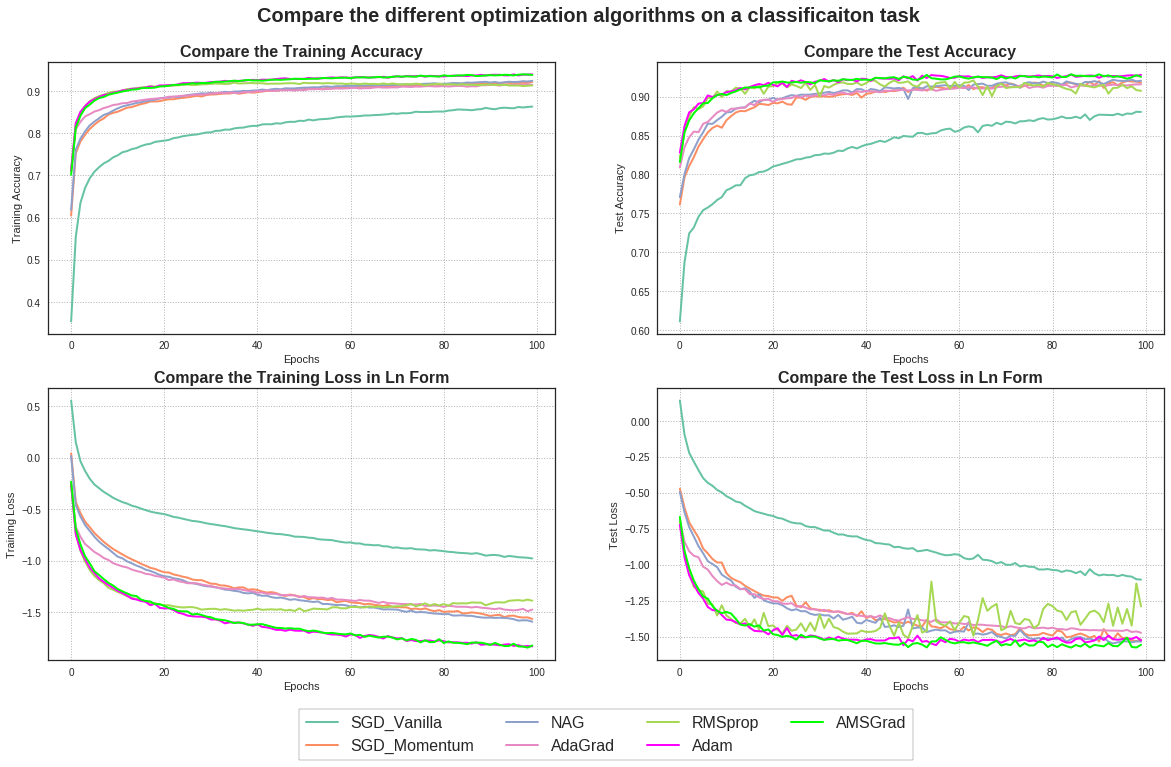

In [54]:
plt.style.use('seaborn-white')
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(20,11))
ax1.plot(model_1_history.history['acc'],color=colors[0],label='SGD_Vanilla')
ax1.plot(model_2_history.history['acc'],color=colors[1],label='SGD_Momentum')
ax1.plot(model_3_history.history['acc'],color=colors[2],label='NAG')
ax1.plot(model_4_history.history['acc'],color=colors[3],label='AdaGrad')
ax1.plot(model_5_history.history['acc'],color=colors[4],label='RMSprop')
ax1.plot(model_6_history.history['acc'],color='fuchsia',label='Adam')
ax1.plot(model_7_history.history['acc'],color='lime',label='AMSGrad')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Training Accuracy')
ax1.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax1.set_title('Compare the Training Accuracy',fontsize=16, fontweight='bold')


ax2.plot(model_1_history.history['val_acc'],color=colors[0],label='SGD_Vanilla')
ax2.plot(model_2_history.history['val_acc'],color=colors[1],label='SGD_Momentum')
ax2.plot(model_3_history.history['val_acc'],color=colors[2],label='NAG')
ax2.plot(model_4_history.history['val_acc'],color=colors[3],label='AdaGrad')
ax2.plot(model_5_history.history['val_acc'],color=colors[4],label='RMSprop')
ax2.plot(model_6_history.history['val_acc'],color='fuchsia',label='Adam')
ax2.plot(model_7_history.history['val_acc'],color='lime',label='AMSGrad')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Test Accuracy')
ax2.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax2.set_title('Compare the Test Accuracy',fontsize=16, fontweight='bold')


ax3.plot(np.log(model_1_history.history['loss']),color=colors[0],label='SGD_Vanilla')
ax3.plot(np.log(model_2_history.history['loss']),color=colors[1],label='SGD_Momentum')
ax3.plot(np.log(model_3_history.history['loss']),color=colors[2],label='NAG')
ax3.plot(np.log(model_4_history.history['loss']),color=colors[3],label='AdaGrad')
ax3.plot(np.log(model_5_history.history['loss']),color=colors[4],label='RMSprop')
ax3.plot(np.log(model_6_history.history['loss']),color='fuchsia',label='Adam')
ax3.plot(np.log(model_7_history.history['loss']),color='lime',label='AMSGrad')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Training Loss')
ax3.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax3.set_title('Compare the Training Loss in Ln Form',fontsize=16, fontweight='bold')

ax4.plot(np.log(model_1_history.history['val_loss']),color=colors[0],label='SGD_Vanilla')
ax4.plot(np.log(model_2_history.history['val_loss']),color=colors[1],label='SGD_Momentum')
ax4.plot(np.log(model_3_history.history['val_loss']),color=colors[2],label='NAG')
ax4.plot(np.log(model_4_history.history['val_loss']),color=colors[3],label='AdaGrad')
ax4.plot(np.log(model_5_history.history['val_loss']),color=colors[4],label='RMSprop')
ax4.plot(np.log(model_6_history.history['val_loss']),color='fuchsia',label='Adam')
ax4.plot(np.log(model_7_history.history['val_loss']),color='lime',label='AMSGrad')
ax4.set_xlabel('Epochs')
ax4.set_ylabel('Test Loss')
ax4.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax4.set_title('Compare the Test Loss in Ln Form',fontsize=16, fontweight='bold')

plt.legend(loc='upper center', bbox_to_anchor=(-0.1, -0.15),
          ncol=4, fancybox=False, shadow=False, frameon=True,edgecolor='black',fontsize=16)

fig.suptitle('Compare the different optimization algorithms on a classificaiton task',fontsize=20, fontweight='bold',y=0.95)
plt.show()